#  Metodo Montecarlo  para  funciones de  partición

Tomaremos  como  ejemplo  un oscilador  armonico  cuantico

$$ \hat{H}=-\frac{\hbar^2}{2m}\nabla ^{2} +\frac{1}{2}m\omega^2 x^2
$$
Los  posibles  estados de  energia de  un  oscilador  armonico  cuantico  son 

$$E=\hbar \omega (n+\frac{1}{2}),$$
donde   $n$  es un  entero.

Si  el  sistema esta  en  contacto  con  reservorio  termico  y queda en  equilibrio,  entonces  la  probabilidad de  cada  microestado  esta  dada por:

$$p_{i}=\frac{e^{-E_{i}/KT}}{Z(T)}$$

con $Z(T)=\sum_{i}e^{-E_{i}/KT} $

Para  calcular un  observable 

$$<X>=\sum_{i}X_{i}p_{i}$$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from random import uniform,randint
from sympy import *

def deltaE(n, kbT):
    n_p=max(n+(-1)**randint(0,1),0)
    dE= hw*(n_p+0.5)-hw*(n+0.5)
    if  dE <= 0.0:
        return n_p
    else:
        r=uniform(0.,1.)
        if np.exp(-dE/kbT) >= r:
            return n_p
        else:
            return  n

def Em1(n, hw, kbT, nsample):
    sts=[]
    nsteps = 500
    ct=0
    for i in range(nsample):
        n=deltaE(n, kbT)
        if ct ==nsteps:
            sts.append(n)
            ct=0
        ct+=1
    pr=np.unique(sts,return_counts=True)
    Em = [hw*(pr[0][i]+0.5)*pr[1][i]/len(sts) for i in range(np.shape(pr)[1])]
    return sum(Em)

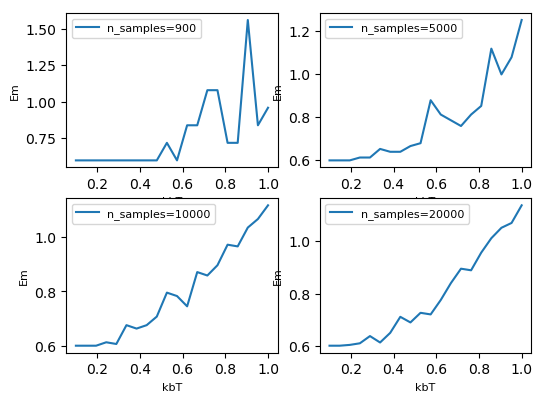

In [2]:
# Definiendo parametros
hw =1.2
kbT =0.5
nsample =1000
n=0

# Calculando la energia media con diferentes Nsamples.
fig,ax = plt.subplots(figsize=(6.,4.5), dpi=100, ncols=2, nrows=2)
axs = [ax[0,0], ax[0,1], ax[1,0], ax[1,1]]
kbT1 = np.linspace(0.1, 1.0, 20)
nsample = [900, 5000, 10000, 20000]
c=0
for j in nsample:
    E1 = []
    for i in kbT1:
        nn=10
        E = [Em1(n, hw, i, j) for k in range(nn)]
        E1 += [np.sum(E)/nn]        
    axs[c].set_xlabel("kbT", fontsize=8)
    axs[c].set_ylabel("Em", fontsize=8)
    axs[c].plot(kbT1, E1, label='n_samples='+str(j))
    axs[c].legend(fontsize=8)
    c+=1

In [3]:
# Calculando la energia media simbolicamente.
def Em2(hw, kbT):
    i = Symbol('i', integer=True)
    Z = summation(exp(-hw*(i+0.5)/kbT), (i, 0, oo))
    E = summation(exp(-hw*(i+0.5)/kbT)*hw*(i+0.5), (i, 0, oo))
    Emed= E.evalf()/Z.evalf()
    return Emed

kbT2 = np.linspace(0.1, 1.0, 10)
E2 = [Em2(hw, i) for i in kbT2]

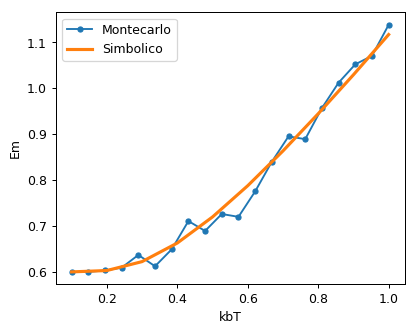

In [14]:
plt.figure(figsize=(5,4.), dpi=90)
plt.plot(kbT1, E1, '-o', ms=4, label='Montecarlo')
plt.plot(kbT2, E2, lw=2.5, label='Simbolico')
plt.xlabel("kbT")
plt.ylabel("Em")
plt.legend()
plt.show()